In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
# convert to datetime
df['datetime'] = pd.to_datetime(df['datetime'], yearfirst=True, dayfirst=False)
# sort by datetime
df = df.sort_values(by='datetime', ascending=True)

In [5]:
def getSplit(df, split):
    return df[df['id'] == split].drop('id', axis=1)

In [6]:
df1 = getSplit(df, 1)
df1.head(3)

,datetime,calls
0,2016-11-30 23:00:00,16
1,2016-11-30 23:30:00,19
2,2016-12-01 00:00:00,22


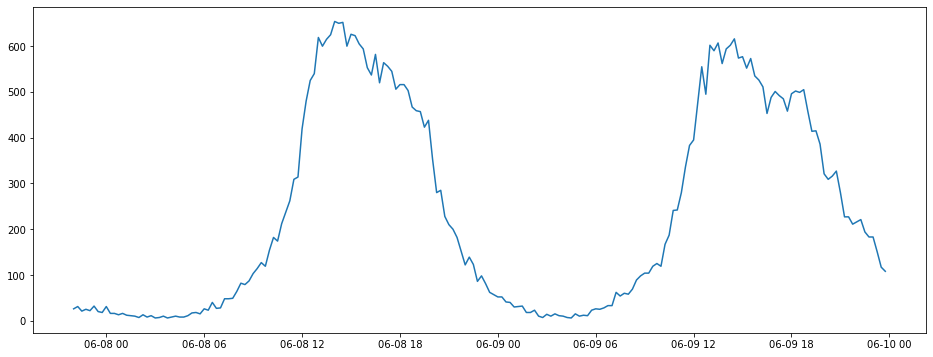

In [7]:
X = df1.set_index('datetime')
plt.figure(figsize=(16,6))
plt.plot(X.iloc[-200:]);

In [8]:
vc = df1['datetime'].dt.date.value_counts()
dfc = df1[df1['datetime'].dt.date.isin(vc[vc==96].index)]

In [9]:
# weekday

In [10]:
dfw = dfc[dfc['datetime'].dt.weekday == 0]

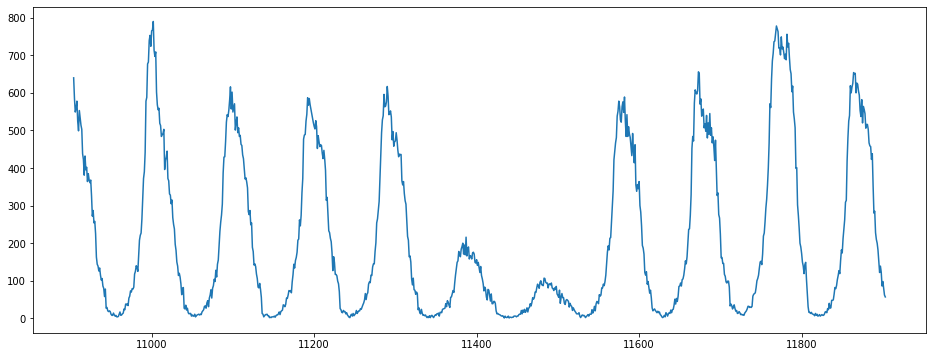

In [11]:
X = dfw.reset_index()['calls']
plt.figure(figsize=(16,6))
plt.plot(X.iloc[-1000:]);

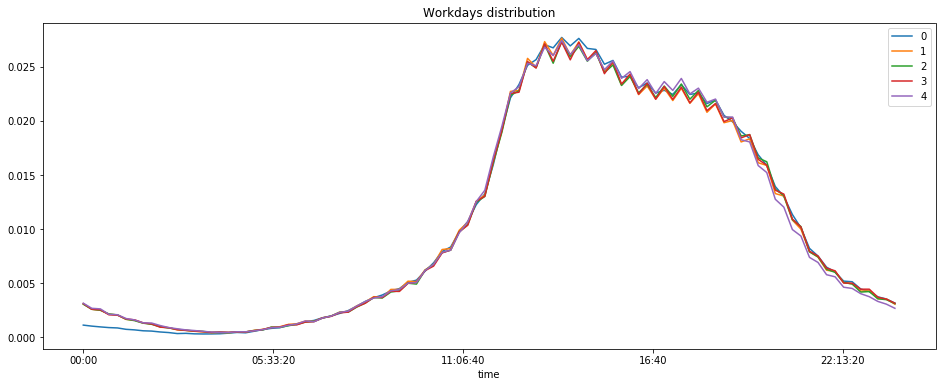

In [12]:
plt.figure(figsize=(16,6))
plt.title('Workdays distribution')
for w in [0,1,2,3,4]:
    dfw = dfc[dfc['datetime'].dt.weekday == w]
    
    pmf = dfw.groupby(dfw['datetime'].dt.time)['calls'].mean()
    pmf /= pmf.sum()
    plt.plot(pmf, label=str(w));
    #plt.show();
plt.legend();

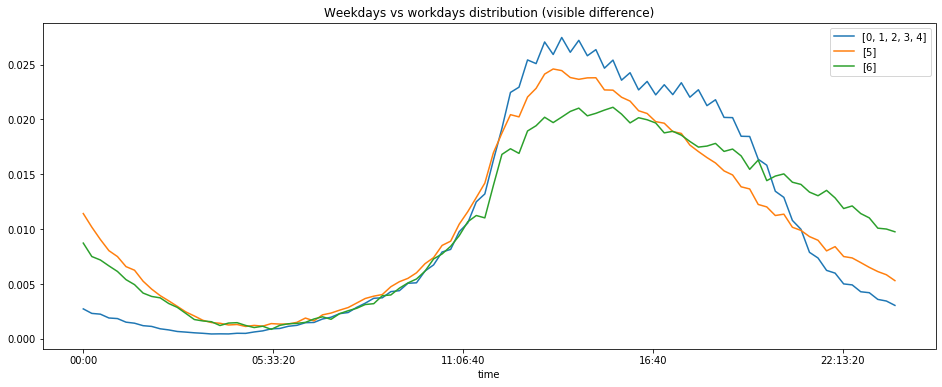

In [13]:
plt.figure(figsize=(16,6))
plt.title('Weekdays vs workdays distribution (visible difference)')
pmfs = []
for w in [[0,1,2,3,4], [5], [6]]:
    dfw = dfc[dfc['datetime'].dt.weekday.isin(w)]
    
    pmf = dfw.groupby(dfw['datetime'].dt.time)['calls'].mean()
    pmf /= pmf.sum()
    plt.plot(pmf, label=str(w));
    pmfs.append(pmf.reset_index())
    #plt.show();
plt.legend();

In [14]:
vc = df1['datetime'].dt.date.value_counts()
# complete
dfc = df1[df1['datetime'].dt.date.isin(vc[vc==96].index)]
dfw = dfc[dfc['datetime'].dt.weekday.isin([0, 1,2,3,4])]
# get pmf for each day
dfw['calls'] = dfw.groupby(dfw['datetime'].dt.date)['calls'].apply(lambda x: x/x.sum())
# average by time
pmf = dfw.groupby(dfw['datetime'].dt.time)['calls'].mean()
std = dfw.groupby(dfw['datetime'].dt.time)['calls'].std()
mmm = dfw.groupby(dfw['datetime'].dt.date)['calls'].nth(48)

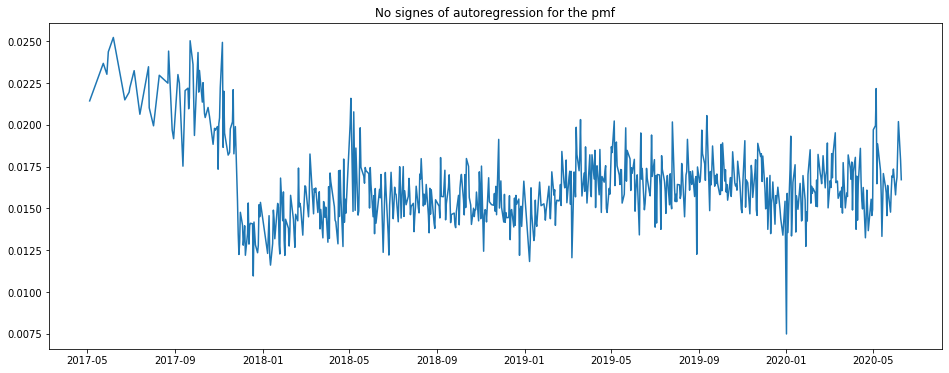

In [15]:
plt.figure(figsize=(16,6)); plt.title('No signes of autoregression for the pmf')
plt.plot(mmm);

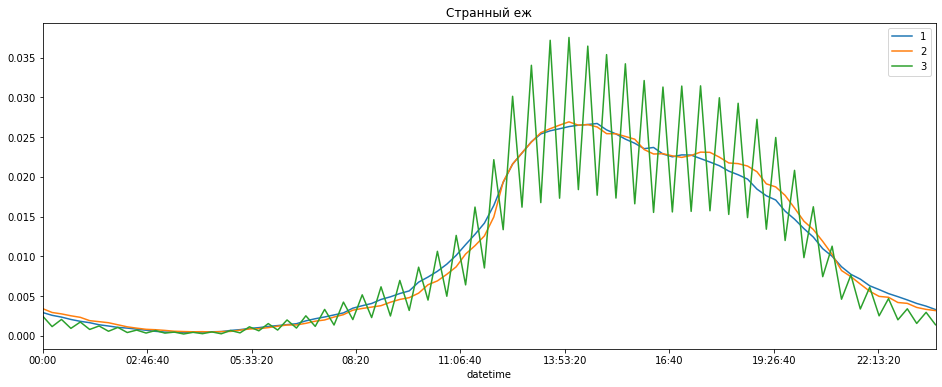

In [16]:
plt.figure(figsize=(16,6)); plt.title('Странный еж')
X1 = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[-50:])]
X2 = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[100:150])]
X3 = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[:31])]
X1.groupby(X1['datetime'].dt.time)['calls'].mean().plot(label='1');
X2.groupby(X2['datetime'].dt.time)['calls'].mean().plot(label='2');
X3.groupby(X3['datetime'].dt.time)['calls'].mean().plot(label='3'); plt.legend();

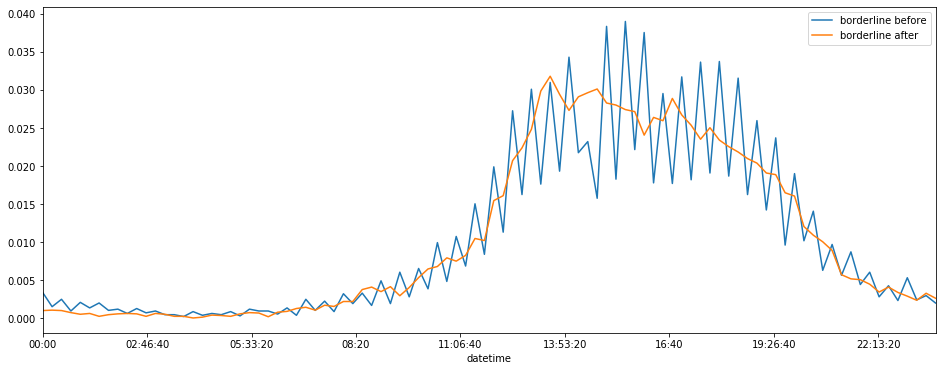

In [17]:
plt.figure(figsize=(16,6))
X1 = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[57:58])]
X2 = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[58:59])]
X1.groupby(X1['datetime'].dt.time)['calls'].mean().plot(label='borderline before');
X2.groupby(X2['datetime'].dt.time)['calls'].mean().plot(label='borderline after');
plt.legend();

In [519]:
list(dfw.groupby(dfw['datetime'].dt.date).groups)[57:59]

[datetime.date(2017, 11, 24), datetime.date(2017, 11, 27)]

In [18]:
# 27 and forward is ok

In [20]:
def getPMF(df, weekdays=[5], normalize=True):
    vc = df['datetime'].dt.date.value_counts()
    # complete
    dfc = df[df['datetime'].dt.date.isin(vc[vc==96].index)]
    dfw = dfc[dfc['datetime'].dt.weekday.isin(weekdays)]
    #
    dfw = dfw[dfw['datetime'].dt.date.isin(list(dfw.groupby(dfw['datetime'].dt.date).groups)[:])]
    # get pmf for each day
    if normalize:
        dfw['calls'] = dfw.groupby(dfw['datetime'].dt.date)['calls'].apply(lambda x: x/x.sum())
    # average by time
    pmf = dfw.groupby(dfw['datetime'].dt.time)['calls'].mean()
    std = dfw.groupby(dfw['datetime'].dt.time)['calls'].std()
    
    return pmf, std, dfw

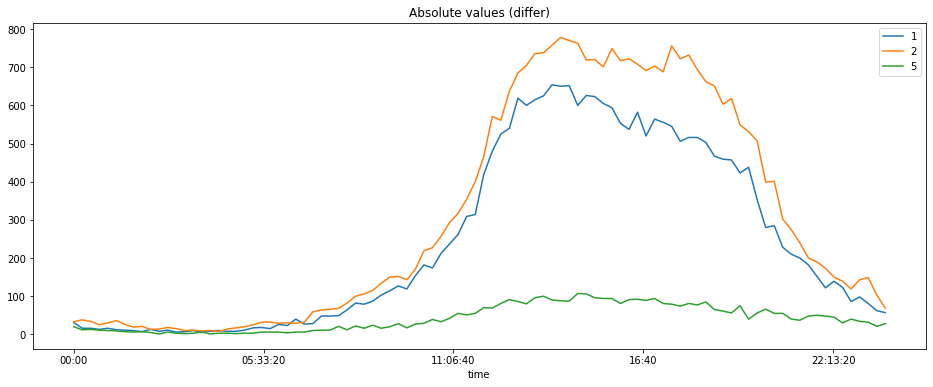

In [21]:
_,_,dfw = getPMF(df1[df1['datetime'] >= datetime.date(2017, 11, 27)], weekdays=[0], normalize=False)

plt.figure(figsize=(16,6)); plt.title('Absolute values (differ)')
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-1), label='1');
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-2), label='2');
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-5), label='5');
plt.legend();

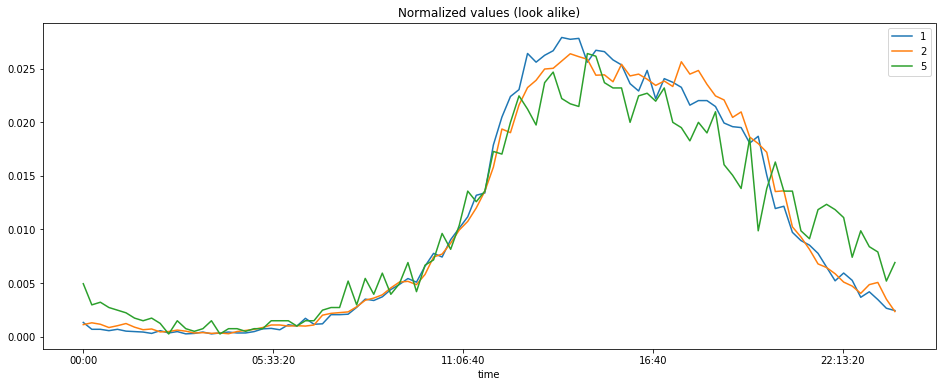

In [22]:
_,_,dfw = getPMF(df1[df1['datetime'] >= datetime.date(2017, 11, 27)], weekdays=[0], normalize=True)

plt.figure(figsize=(16,6)); plt.title('Normalized values (look alike)')
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-1), label='1');
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-2), label='2');
plt.plot(dfw.groupby(dfw['datetime'].dt.time)['calls'].nth(-5), label='5');
plt.legend();

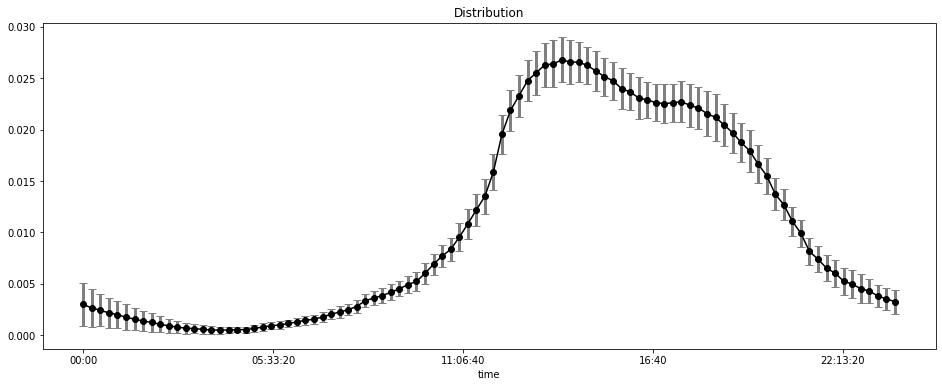

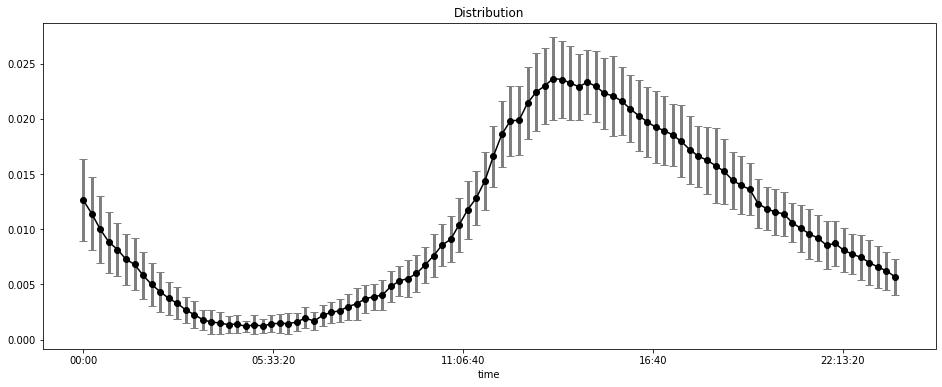

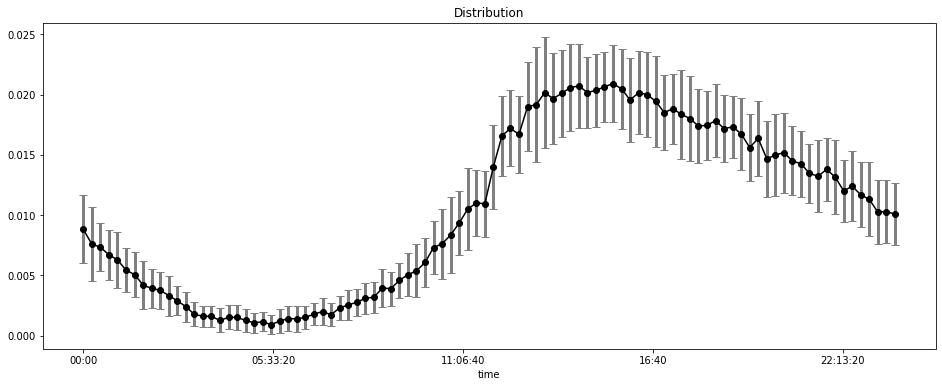

In [542]:
for w in [[0, 1, 2, 3, 4], [5], [6]]:
    pmf, std, _ = getPMF(df1[df1['datetime'] >= datetime.date(2017, 11, 27)], weekdays=w)

    plt.figure(figsize=(16,6)); plt.title('Distribution')
    plt.errorbar(pmf.index, pmf, std, linestyle='-', marker='o', capsize=4, fmt='.k', ecolor='gray', elinewidth=3);
    plt.show()

In [6]:
# more lag features
# research events
# study pmf
# news

In [ ]:
# add lag features for the same time period (baseline)
# add them to model
# events to news mapping
# gradient boosting